In [ ]:
# imports
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
import ast
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as pltw

In [ ]:
# Load the dataset
titles_df = pd.read_csv("./titles.csv")
titles_df.head(5)

,type,release_year,age_certification,runtime,genres,production_countries,imdb_score,imdb_votes
0,SHOW,1945,TV-MA,51,['documentation'],['US'],NaN,NaN
1,MOVIE,1976,R,114,"['drama', 'crime']",['US'],8.2,808582.0
2,MOVIE,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],7.7,107673.0
3,MOVIE,1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],8.2,534486.0
4,MOVIE,1967,NaN,150,"['war', 'action']","['GB', 'US']",7.7,72662.0


In [ ]:
# Data Cleanup
titles_df = titles_df.dropna() # Removes row with any NaN values

In [ ]:
# Data Transformation
# Convert string formatted arrays to lists
titles_df['genres'] = titles_df['genres'].apply(ast.literal_eval)
titles_df['production_countries'] = titles_df['production_countries'].apply(ast.literal_eval)

# Transform genres column
genres_df = titles_df['genres'].apply(lambda x: pd.Series([1] * len(x), index=x, dtype= int)).fillna(0)
titles_df = pd.concat([titles_df, genres_df], axis=1)

# Transform production_countries column
countries_df = titles_df['production_countries'].apply(lambda x: pd.Series([1] * len(x), index=x, dtype= int)).fillna(0)
titles_df = pd.concat([titles_df, countries_df], axis=1)

# ordinal encode age certification and type
enc = OrdinalEncoder()
titles_df[['age_certification', 'type']] = enc.fit_transform(titles_df[['age_certification', 'type']])

# encode imdb score based on whether it's greater than 8 or not
titles_df['imdb_score'] = titles_df['imdb_score'].apply(lambda x: 1 if x >= 8 else 0)

# remove original columns
titles_df = titles_df.drop(['genres', 'production_countries'], axis=1)

titles_df.head(5)

,type,release_year,age_certification,runtime,imdb_score,imdb_votes,drama,crime,action,thriller,...,AL,PT,MY,MU,KW,EG,GR,KN,MA,TN
1,0.0,1976,4.0,114,1,808582.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1972,4.0,109,0,107673.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1975,2.0,91,1,534486.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,1969,5.0,30,1,73424.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,1979,4.0,94,1,395024.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#balance dataset
count_zero = 0
count_one = 0

for key in titles_df.index:
  if (titles_df.loc[key, 'imdb_score'] == 0):
    count_zero += 1
  elif (titles_df.loc[key, 'imdb_score'] == 1):
    count_one += 1

i = 0
if count_zero > count_one:
  while i < len(titles_df.index) and (count_zero > count_one):
    key = titles_df.index[i]
    if titles_df.loc[key, 'imdb_score'] == 0:
        titles_df.drop(key, inplace= True)
        count_zero -= 1
    else:
      i += 1

elif count_zero < count_one:
  while i < len(titles_df.index) and (count_zero < count_one):
    key = titles_df.index[i]
    if titles_df.loc[key, 'imdb_score'] == 1:
        titles_df.drop(key, inplace= True)
        count_one -= 1
    else:
      i += 1

print(count_zero, count_one)
titles_df.head(5)

381 381


,type,release_year,age_certification,runtime,imdb_score,imdb_votes,drama,crime,action,thriller,...,AL,PT,MY,MU,KW,EG,GR,KN,MA,TN
1,0.0,1976,4.0,114,1,808582.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1975,2.0,91,1,534486.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,1969,5.0,30,1,73424.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,1979,4.0,94,1,395024.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,1979,4.0,78,1,5141.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split

target_column = ['imdb_score'] # column names for target
features = list(set(list(titles_df.columns))-set(target_column)) # column names for features

# separate target and features
X = titles_df[features]
y = titles_df[target_column]

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
# train-val split
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.20,random_state=42)

print(X_train, X_test, X_val)

       AU   AR   KN   BR   EG  comedy   DE   TN   BE   PK  ...   PT   IL  \
5620  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
12    0.0  0.0  0.0  0.0  0.0     1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1683  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
5187  0.0  0.0  0.0  0.0  0.0     1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
38    0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
...   ...  ...  ...  ...  ...     ...  ...  ...  ...  ...  ...  ...  ...   
5268  0.0  0.0  0.0  1.0  0.0     0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
35    0.0  0.0  0.0  0.0  0.0     1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1905  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
5418  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
5411  0.0  0.0  0.0  0.0  0.0     1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   

      scifi   PR   ID   NZ   MY  reality  crime   NO  
5620    0.0  0.0  0.0  0.0  0.0 

In [ ]:
# Normalize dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

print(X_train.shape, X_val.shape, X_test.shape)

(548, 103) (137, 103) (77, 103)


In [ ]:
from sklearn import metrics

# make confusion matrix
def conf_matrix(y_test,y_pred):
  return metrics.confusion_matrix(y_test, y_pred)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#heat map function
def heat_map(cnf_matrix):
  class_names=[0,1] # name  of classes
  fig, ax = plt.subplots()
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names)
  plt.yticks(tick_marks, class_names)
  # create heatmap
  sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
  ax.xaxis.set_label_position("top")
  plt.tight_layout()
  plt.title('Confusion matrix', y=1.1)
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')


In [ ]:
from sklearn.metrics import classification_report
def class_report(y_test,y_pred):
  target_names = ['imdb score < 8','imdb score >= 8']
  print(classification_report(y_test, y_pred, target_names=target_names))

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

5
0.9197080291970803


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                 precision    recall  f1-score   support

 imdb score < 8       0.84      0.97      0.90        39
imdb score >= 8       0.97      0.82      0.89        38

       accuracy                           0.90        77
      macro avg       0.91      0.90      0.90        77
   weighted avg       0.91      0.90      0.90        77



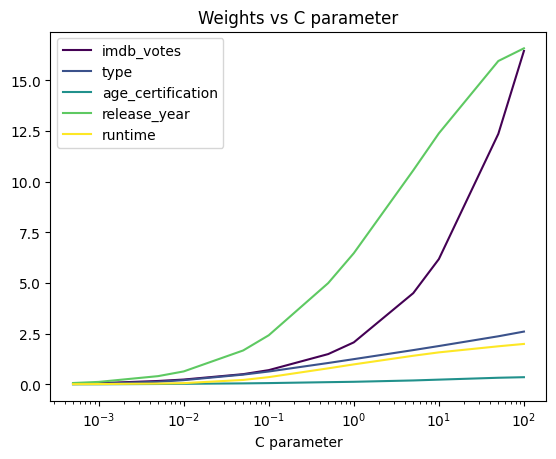

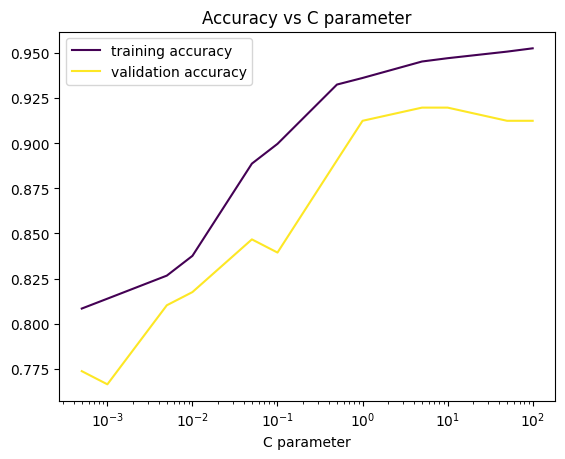

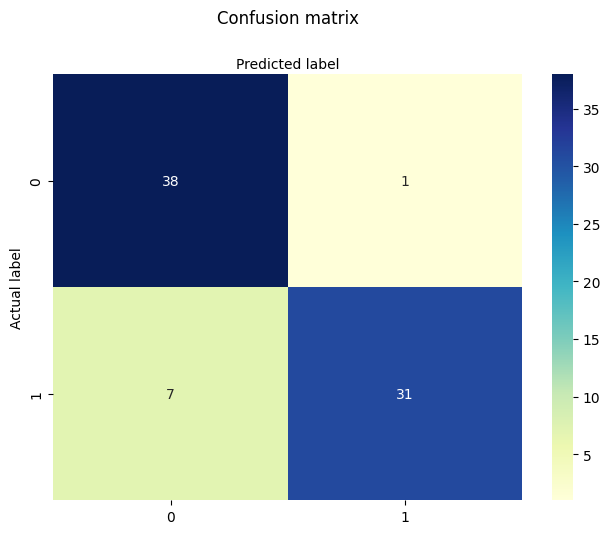

In [ ]:
#Logistic Regression Model: https://www.datacamp.com/tutorial/understanding-logistic-regression-python

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

r_params = [0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,5,10,50,100]
#r_params = [1]


def log_reg_model(X_train,y_train,X_val, y_val,X_test,y_test):
  # instantiate the model (using the default parameters)
  weights = {'C parameter':r_params,'imdb_votes':[],
             'type':[],'age_certification':[],'release_year':[],'runtime':[]}
  acc = 0
  accs = {'C parameter':r_params,'training accuracy':[],'validation accuracy':[]}
  best_r = 0
  for r in r_params:
    w = []
    logreg = LogisticRegression(random_state=42,C=r,class_weight='balanced') #l2 regularization is default applied, parameter 'C' can be tweaked <-- refer to sklearn documentation

    # fit the model with data
    logreg.fit(X_train, y_train) #use model on training set

    # add in weights to dictionary
    weights['imdb_votes'].append(abs(logreg.coef_[0][features.index('imdb_votes')]))
    weights['type'].append(abs(logreg.coef_[0][features.index('type')]))
    weights['age_certification'].append(abs(logreg.coef_[0][features.index('age_certification')]))
    weights['release_year'].append(abs(logreg.coef_[0][features.index('release_year')]))
    weights['runtime'].append(abs(logreg.coef_[0][features.index('runtime')]))

    train_pred = logreg.predict(X_train) #use model on training set
    val_pred = logreg.predict(X_val) # use model on validation set
    test_pred = logreg.predict(X_test) # use model on test set

    train_acc = accuracy_score(y_train,train_pred)
    val_acc = accuracy_score(y_val,val_pred)
    test_acc = accuracy_score(y_test,test_pred)
    accs['training accuracy'].append(train_acc)
    accs['validation accuracy'].append(val_acc)
    if acc < val_acc:
      best_r = r
      acc = val_acc

  print(best_r) # get best C parameter
  print(acc)
  # plot the weights vs C parameter
  data = pd.DataFrame(weights)
  data.plot(x='C parameter', title = 'Weights vs C parameter', colormap = 'viridis',logx=True)

  acc_data = pd.DataFrame(accs)
  acc_data.plot(x='C parameter', title = 'Accuracy vs C parameter', colormap = 'viridis',logx=True)

  logreg = LogisticRegression(random_state=42,C=best_r,class_weight='balanced') #l2 regularization is default applied, parameter 'C' can be tweaked <-- refer to sklearn documentation

  # fit the model with data
  logreg.fit(X_train, y_train) #use model on training set

  test_pred = logreg.predict(X_test) # use model on test set

  heat_map(conf_matrix(y_test,test_pred)) #confusion matrix of validation set
  class_report(y_test,test_pred) #classificiation report of validation set

trans = PolynomialFeatures(degree=2)
X_train_2,X_val_2,X_test_2 = trans.fit_transform(X_train),trans.fit_transform(X_val),trans.fit_transform(X_test)

log_reg_model(X_train,y_train,X_val,y_val,X_test,y_test)


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

5.0
0.927007299270073


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                 precision    recall  f1-score   support

 imdb score < 8       0.88      0.97      0.93        39
imdb score >= 8       0.97      0.87      0.92        38

       accuracy                           0.92        77
      macro avg       0.93      0.92      0.92        77
   weighted avg       0.93      0.92      0.92        77



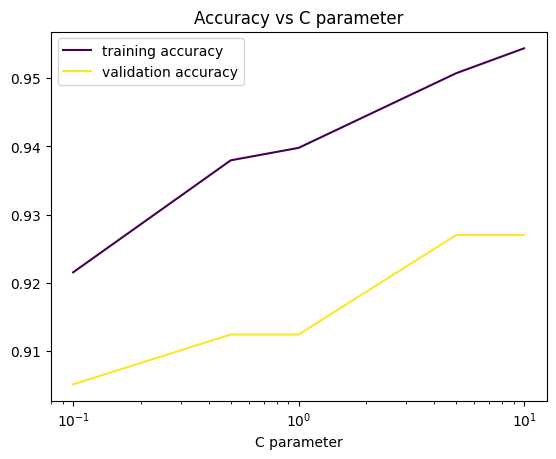

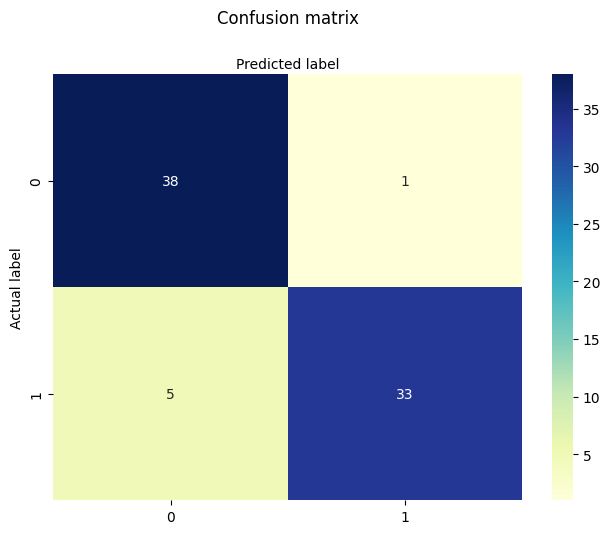

In [ ]:
#SVM Model: https://github.com/christianversloot/machine-learning-articles/blob/main/creating-a-simple-binary-svm-classifier-with-python-and-scikit-learn.md

from sklearn import svm
from sklearn.metrics import accuracy_score
import pandas as pd

#r_params = [0.1,0.5,1.0,5.,10.0,50.,100.,1000.,10000.] #rbf
#r_params = [0.1,0.5,1.0,5.,10.0,50.,100.,1000.,10000.,100000.,1000000.] #poly
r_params = [0.1,0.5,1.0,5.,10.0] #linear
#r_params = [1]
kernel_type = 'linear'

def svm_model(X_train,y_train,X_val,y_val,X_test,y_test):
  acc = 0
  accs = {'C parameter':r_params,'training accuracy':[],'validation accuracy':[]}
  best_r = 0

  for r in r_params:
    # Initialize SVM classifier
    clf = svm.SVC(kernel=kernel_type,C=r,class_weight='balanced') # kernel can be ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’, regularization parameter C, refer to sklearn documentation

    # Fit data
    clf = clf.fit(X_train, y_train)

    train_pred = clf.predict(X_train)
    val_pred = clf.predict(X_val)
    test_pred = clf.predict(X_test)

    train_acc = accuracy_score(y_train,train_pred)
    val_acc = accuracy_score(y_val,val_pred)
    test_acc = accuracy_score(y_test,test_pred)
    accs['training accuracy'].append(train_acc)
    accs['validation accuracy'].append(val_acc)
    if acc < val_acc:
      best_r = r
      acc = val_acc

  print(best_r)
  print(acc)

  acc_data = pd.DataFrame(accs)
  acc_data.plot(x='C parameter', title = 'Accuracy vs C parameter', colormap = 'viridis',logx=True)

  clf = svm.SVC(kernel=kernel_type,C=best_r,class_weight='balanced') # kernel can be ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’, regularization parameter C, refer to sklearn documentation

  # Fit data
  clf = clf.fit(X_train, y_train)

  test_pred = clf.predict(X_test) # use model on validation set

  heat_map(conf_matrix(y_test,test_pred)) # confusion matrix of validation set
  class_report(y_test,test_pred) # classificiation report of validation set

svm_model(X_train,y_train,X_val,y_val,X_test,y_test)

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                 precision    recall  f1-score   support

 imdb score < 8       0.87      0.92      0.89        71
imdb score >= 8       0.90      0.85      0.88        66

       accuracy                           0.88       137
      macro avg       0.88      0.88      0.88       137
   weighted avg       0.88      0.88      0.88       137



/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                 precision    recall  f1-score   support

 imdb score < 8       0.86      0.83      0.84        71
imdb score >= 8       0.82      0.85      0.84        66

       accuracy                           0.84       137
      macro avg       0.84      0.84      0.84       137
   weighted avg       0.84      0.84      0.84       137



/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                 precision    recall  f1-score   support

 imdb score < 8       0.87      0.86      0.87        71
imdb score >= 8       0.85      0.86      0.86        66

       accuracy                           0.86       137
      macro avg       0.86      0.86      0.86       137
   weighted avg       0.86      0.86      0.86       137



/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                 precision    recall  f1-score   support

 imdb score < 8       0.86      0.93      0.89        71
imdb score >= 8       0.92      0.83      0.87        66

       accuracy                           0.88       137
      macro avg       0.89      0.88      0.88       137
   weighted avg       0.89      0.88      0.88       137



/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                 precision    recall  f1-score   support

 imdb score < 8       0.88      0.90      0.89        71
imdb score >= 8       0.89      0.86      0.88        66

       accuracy                           0.88       137
      macro avg       0.88      0.88      0.88       137
   weighted avg       0.88      0.88      0.88       137



/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                 precision    recall  f1-score   support

 imdb score < 8       0.83      0.90      0.86        71
imdb score >= 8       0.88      0.80      0.84        66

       accuracy                           0.85       137
      macro avg       0.86      0.85      0.85       137
   weighted avg       0.86      0.85      0.85       137



/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                 precision    recall  f1-score   support

 imdb score < 8       0.91      0.85      0.88        71
imdb score >= 8       0.85      0.91      0.88        66

       accuracy                           0.88       137
      macro avg       0.88      0.88      0.88       137
   weighted avg       0.88      0.88      0.88       137

{2: 0.8832116788321168, 3: 0.8832116788321168, 4: 0.8540145985401459, 5: 0.8759124087591241}
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] [0.8832116788321168, 0.8394160583941606, 0.8613138686131386, 0.8832116788321168, 0.8832116788321168, 0.8540145985401459, 0.8759124087591241] [0.8832116788321168, 0.8394160583941606, 0.8613138686131386, 0.8832116788321168, 0.8832116788321168, 0.8540145985401459, 0.8759124087591241]


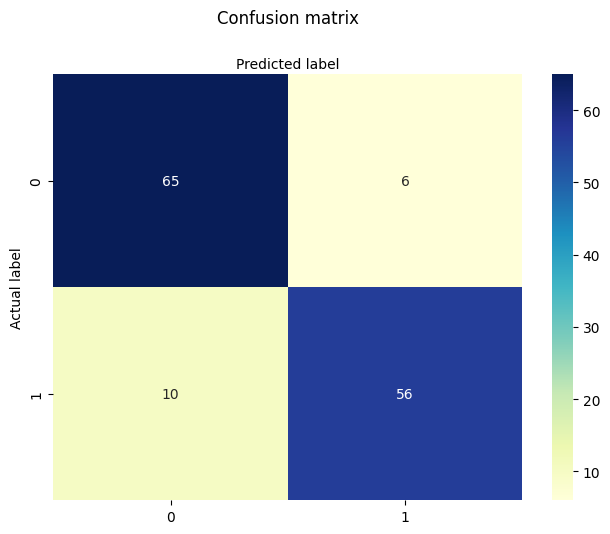

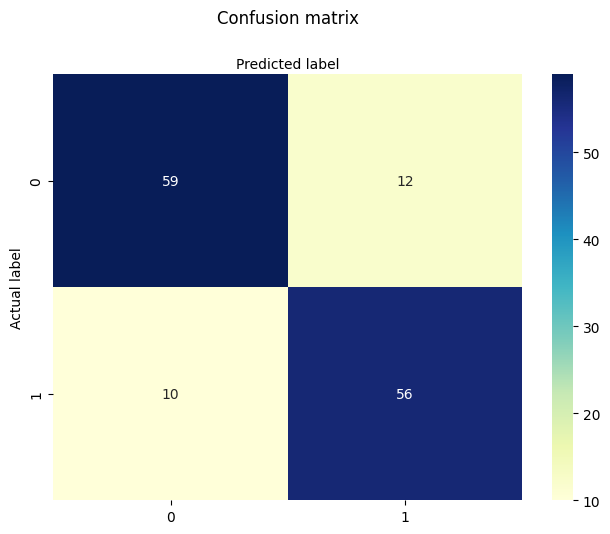

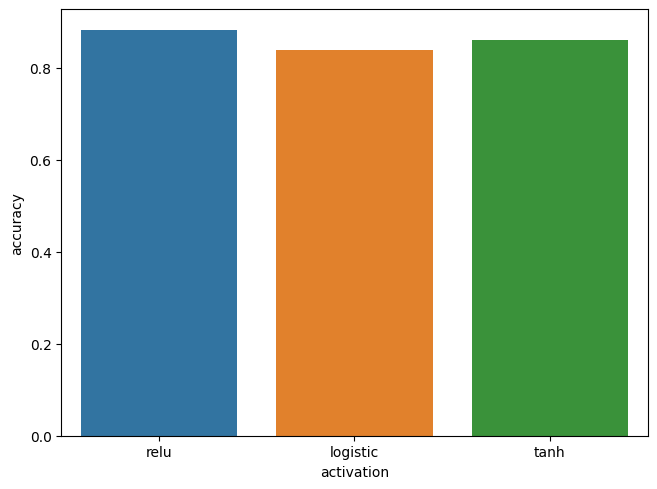

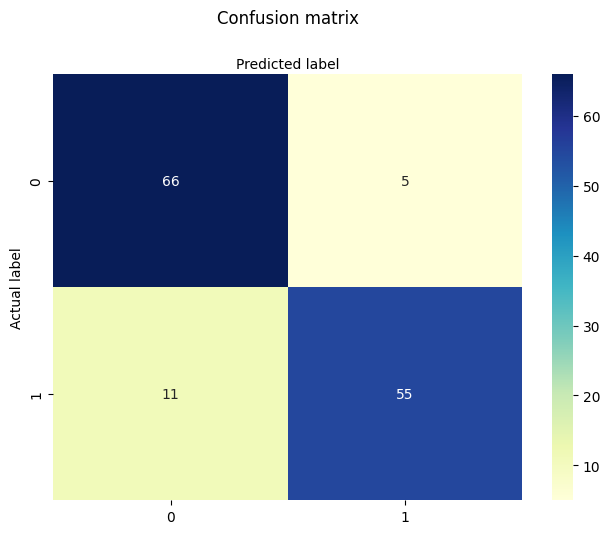

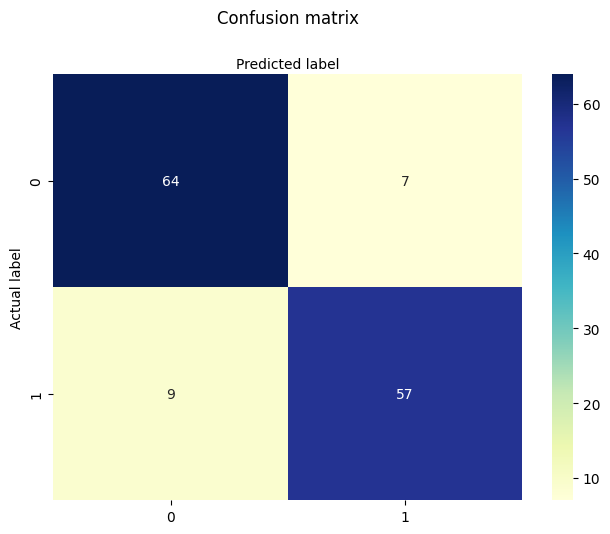

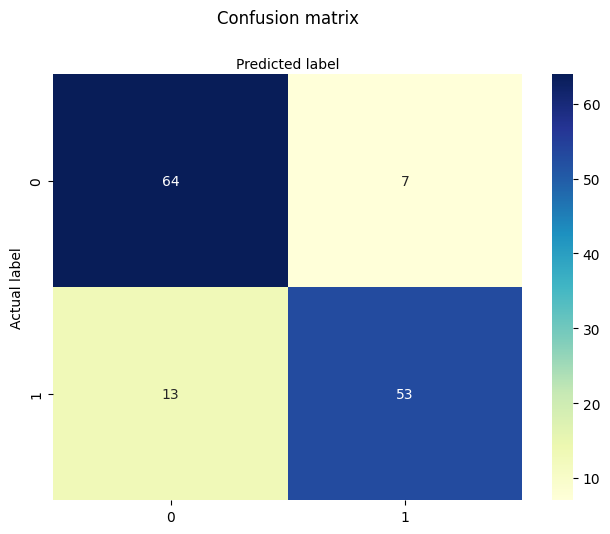

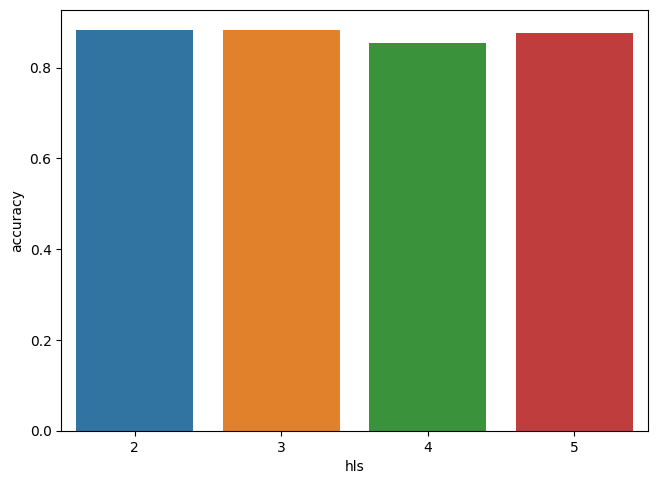

In [ ]:
#Neural Network Model: https://www.pluralsight.com/guides/machine-learning-neural-networks-scikit-learn
import seaborn as sns
import sklearn
from sklearn.neural_network import MLPClassifier

def neural_network_model(X_train,y_train,X_test,y_test):
  # hyperparameters
  hidden_layer_sizes = [(100,), (100,75,), (100,75,50,), (100,75,50,25,)]
  activations = ['relu', 'logistic', 'tanh']

  # mlp function generators
  def mlpGenerator(act, hls):
    return MLPClassifier(hidden_layer_sizes= hls, activation=act, solver='lbfgs', max_iter=500)

  test_accuracies = []
  train_accuracies = []
  val_accuracies = []
  # for each model
    # train
    # predict
    # analyze
    # record (test accuracy, train accuracy)
  for act in activations:
    mlp = mlpGenerator(act, (100,))
    mlp.fit(X_train,y_train)

    train_pred = mlp.predict(X_train)
    test_pred = mlp.predict(X_test)
    val_pred = mlp.predict(X_val)

    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    val_acc = accuracy_score(y_val, val_pred)

    test_accuracies.append(test_acc)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

    # show classification report and heatmap for that speciific model
    heat_map(conf_matrix(y_test,test_pred)) #confusion matrix of validation set
    class_report(y_test,test_pred) #classificiation report of validation set

  # histogram graph each accuracy per activation
  plt.clf()
  act_obj = { activations[i]:test_accuracies[i] for i in range(len(activations)) }
  act_end_test = len(test_accuracies)
  act_df = pd.DataFrame(list(act_obj.items()), columns=['activation', 'accuracy'])
  sns.barplot(x="activation", y="accuracy", data=act_df)

  for hls in hidden_layer_sizes:
    mlp = mlpGenerator('relu', hls)
    mlp.fit(X_train,y_train)

    train_pred = mlp.predict(X_train)
    test_pred = mlp.predict(X_test)
    val_pred = mlp.predict(X_val)

    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    val_acc = accuracy_score(y_val, val_pred)

    test_accuracies.append(test_acc)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

    # show classification report and heatmap for that speciific model
    heat_map(conf_matrix(y_test,test_pred)) #confusion matrix of validation set
    class_report(y_test,test_pred) #classificiation report of validation set

  # histogram graph each accuracy per hls
  plt.clf()
  hls_obj = { i-act_end_test+2:test_accuracies[i] for i in range(act_end_test, len(test_accuracies))}
  print(hls_obj)
  hls_df = pd.DataFrame( list(hls_obj.items()), columns=['hls', 'accuracy'])
  sns.barplot(x="hls", y="accuracy", data=hls_df)

  # get the best test accuracy (all training accuracies are 100% - neural networks overfit (small dataset))
  # get corresponding test accuracy to that best training accuracy
  max_test_acc = max(test_accuracies)

  print(train_accuracies, val_accuracies, test_accuracies)

  return max_test_acc


nn_res = neural_network_model(X_train,y_train,X_val,y_val)

In [ ]:
print(count_zero,
count_one,
nn_res )

381 381 0.8832116788321168
